In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
A = pd.read_csv("dirty_cafe_sales.csv")
A.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [168]:
A["Transaction ID"] = A["Transaction ID"].str.replace("TXN_",  "" , regex=False)

In [169]:
A[["Item", "Price Per Unit"]].value_counts(dropna=False)

Item      Price Per Unit
Juice     3.0               1110
Coffee    2.0               1108
Cake      3.0               1085
Salad     5.0               1082
Sandwich  4.0               1082
Smoothie  4.0               1036
Cookie    1.0               1026
Tea       1.5               1023
NaN       4.0                 82
          3.0                 80
ERROR     3.0                 77
UNKNOWN   3.0                 77
          4.0                 70
ERROR     4.0                 61
UNKNOWN   2.0                 49
          1.0                 45
          5.0                 45
          1.5                 40
NaN       2.0                 39
ERROR     5.0                 39
NaN       1.0                 38
          5.0                 38
ERROR     1.5                 37
Salad     ERROR               34
ERROR     1.0                 34
NaN       1.5                 33
ERROR     2.0                 31
Juice     ERROR               26
Tea       ERROR               25
Smoothie  NaN     

In [170]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [171]:
A["Price Per Unit"] = pd.to_numeric(A["Price Per Unit"] , errors="coerce")

In [172]:
A["Quantity"] = pd.to_numeric(A["Quantity"] , errors="coerce")

In [173]:
A["Total Spent"] = pd.to_numeric(A["Total Spent"] , errors="coerce")

In [174]:
Items = {
    "Juice":3.0,
    "Coffee":2.0,
    "Cake":3.0,
    "Salad":5.0,
    "Samdwich":4.0,
    "Smoothie":4.0,
    "Cookie":1.0,
    "Tea":1.5
}

In [175]:
Prices = {
3.0:"Juice",
2.0:"Coffee",
3.0:"Cake",
5.0:"Salad",
4.0:"Samdwich",
4.0:"Smoothie",
1.0:"Cookie",
1.5:"Tea"
}

In [176]:
A["Item"].isna().sum()

np.int64(333)

In [177]:
A["Item"] = np.where((A["Item"] == "ERROR")|A["Item"] == "UNKNOWN" , np.nan ,A["Item"] )

In [178]:
A.loc[~pd.isna(A["Total Spent"]), "Price Per Unit"] = A["Total Spent"] / A["Quantity"]
A.loc[pd.isna(A["Total Spent"]), "Total Spent"] = A["Quantity"] * A["Price Per Unit"]

In [179]:
A

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,9659401,NaN,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02
9997,5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [180]:
A["Price Per Unit"].isna().sum()

np.int64(479)

In [181]:
A.dropna(subset="Price Per Unit" , inplace=True)

In [182]:
A.dropna(subset="Quantity" , inplace=True)

In [183]:
A[(pd.isna(A["Quantity"])) & (pd.isna(A["Total Spent"]))]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [184]:
A["Item"] = A["Price Per Unit"].map(Prices)

In [185]:
A["Price Per Unit"] = A["Item"].map(Items)

In [186]:
A.isna().any(axis=0)

Transaction ID      False
Item                False
Quantity            False
Price Per Unit      False
Total Spent         False
Payment Method       True
Location             True
Transaction Date     True
dtype: bool

In [187]:
A.drop_duplicates()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,9659401,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02
9997,5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [188]:
A = A.loc[~A["Payment Method"].isin(["UNKNOWN", "ERROR"]) & ~A["Location"].isin(["UNKNOWN", "ERROR"]) & ~A["Transaction Date"].isin(["UNKNOWN", "ERROR"])]
A.dropna(subset=["Payment Method", "Location", "Transaction Date"], inplace=True)

C:\Users\Neoverse\AppData\Local\Temp\ipykernel_10896\455410088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A.dropna(subset=["Payment Method", "Location", "Transaction Date"], inplace=True)


In [189]:
A.isna().any(axis=0)

Transaction ID      False
Item                False
Quantity            False
Price Per Unit      False
Total Spent         False
Payment Method      False
Location            False
Transaction Date    False
dtype: bool

In [190]:
A.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
4,3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
10,2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07


In [191]:
B = A["Total Spent"].groupby(A["Item"]).sum()

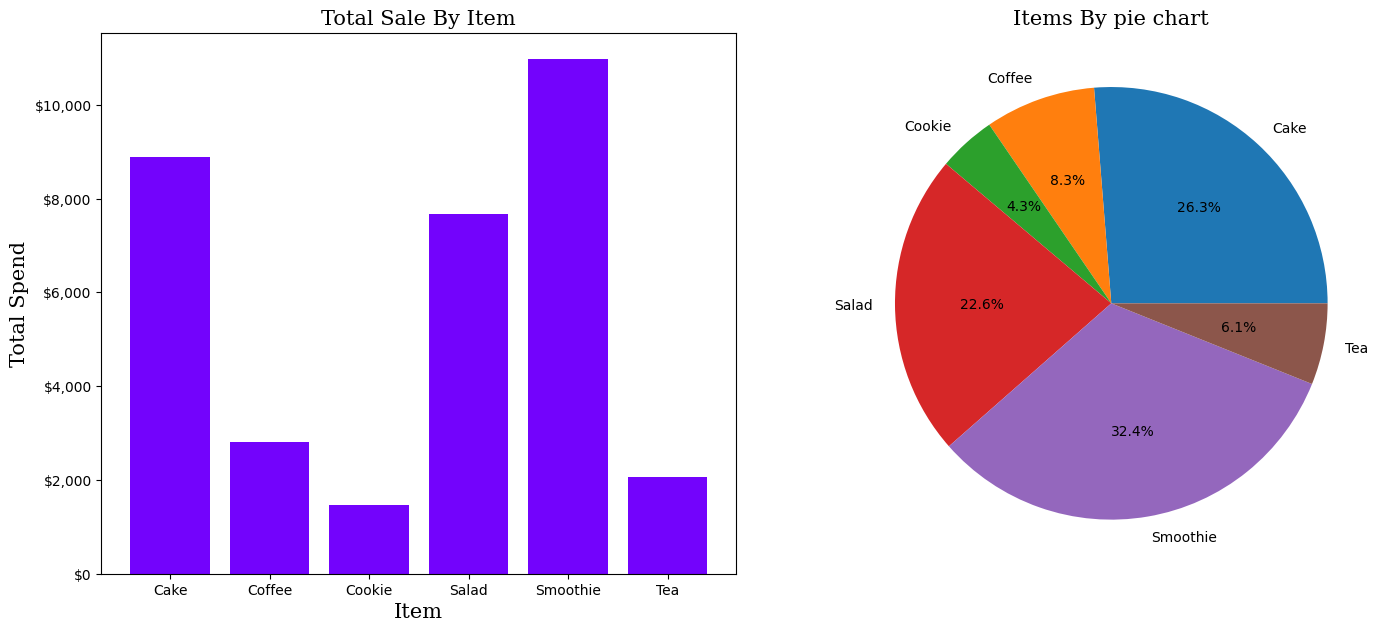

In [192]:
from matplotlib.ticker import FuncFormatter
def currency(x, pos):
    return f'${x:,.0f}'
fig, axs = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)
fig.tight_layout()
font = {'family': 'serif', 'size': 15}
axs[0].set_xlabel("Item", fontdict=font)
axs[0].set_ylabel("Total Spend", size=15, fontdict=font)
axs[0].bar(B.index, B.values, color="#7303fc")
axs[0].yaxis.set_major_formatter(FuncFormatter(currency))
axs[0].set_title("Total Sale By Item", fontdict=font)
axs[1].pie(B.values , labels = B.index , autopct = "%1.1f%%")
axs[1].set_title("Items By pie chart" , fontdict=font )
plt.show()